# Long Short Term Memory (LSTM)
Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.

The expression long short-term refers to the fact that LSTM is a model for the short-term memory which can last for a long period of time. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs.

Components of LSTMs
So the LSTM cell contains the following components



1.   Forget Gate “f” ( a neural network with sigmoid)
2.   Candidate layer “C"(a NN with Tanh)
3.   Input Gate “I” ( a NN with sigmoid )
4.   Output Gate “O”( a NN with sigmoid)
5.   Hidden state “H” ( a vector )
6.   Memory state “C” ( a vector)
7. Inputs to the LSTM cell at any step are Xt (current input) , Ht-1 (previous hidden state ) and Ct-1 (previous memory state).
8. Outputs from the LSTM cell are Ht (current hidden state ) and Ct (current memory state)

# Gated Recurrent Units (GRU)
In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.

# Multiple Stock Prediction Using Time series (LSTM / GRU) in Deep Learning

In [6]:
# reference:
# https://www.kaggle.com/humamfauzi/multiple-stock-prediction-using-single-nn/notebook
# https://medium.com/neuronio/predicting-stock-prices-with-lstm-349f5a0974d4
# https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235

In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')

#!pip install SDG
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#from keras.optimizers import SGD
#from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [8]:
# Some functions to help out with
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [9]:
# Take input and print Ticker Symbol
import os
fileList = os.listdir("/content/")
companyList = []
for file in fileList:
    companyName = file.split("_")[0]
    if companyName != "all" and companyName != ".config" and companyName != "sample":
        companyList.append(companyName)
print(companyList)

['Aeff', 'bi', 'NKE', 'JPM', 'CAT', 'MMM', 'KO', 'MCD', 'BA', 'AABA', 'IBM', 'eml', 'AAPL', 'PFE', 'INTC', 'disp', 'CVX', 'MSFT', 'tx', 'AXP', 'rs', 'AMZN', 'DIS', 'bl', 'JNJ', 'nl', 'CSCO', 'GE', 'MRK', 'neff', 'sc', 'HD', 'pf', 'GOOGL', 'GS', 'conf', 'na', 'veff']


In [10]:
# First, we get the data
# We pick the tech companies from our list. We import each data and place it in a dictionary with key is its ticker symbol
stockList = ["GE", "MSFT", "GOOGL", "AAPL", "AMZN", "IBM", "CSCO"]
df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("/content/" + i + "_2006-01-01_to_2018-01-01.csv", index_col="Date", parse_dates=["Date"])

In [11]:
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]

df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], "2015", "Close")

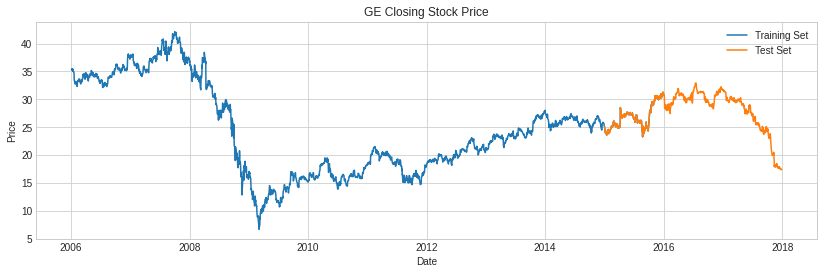

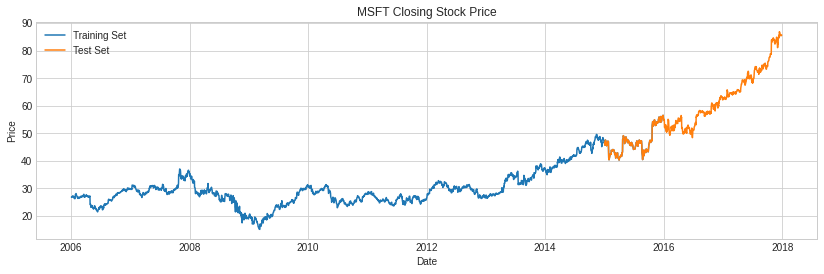

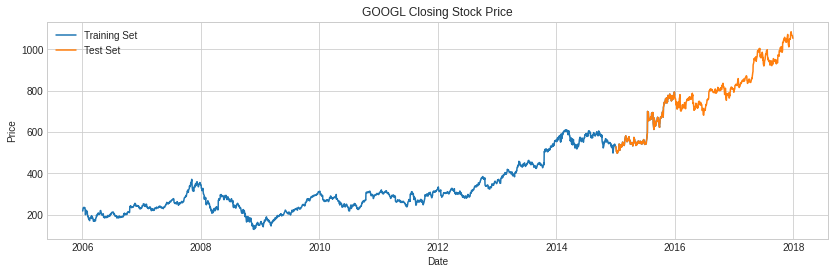

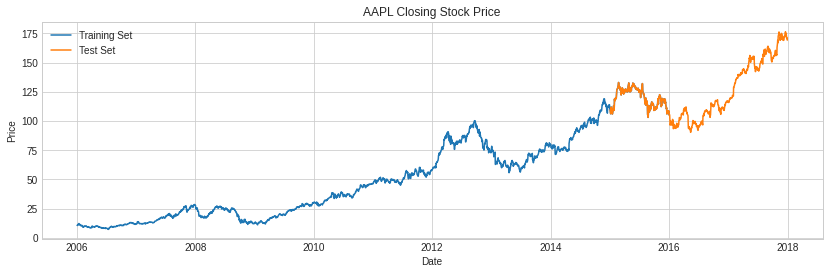

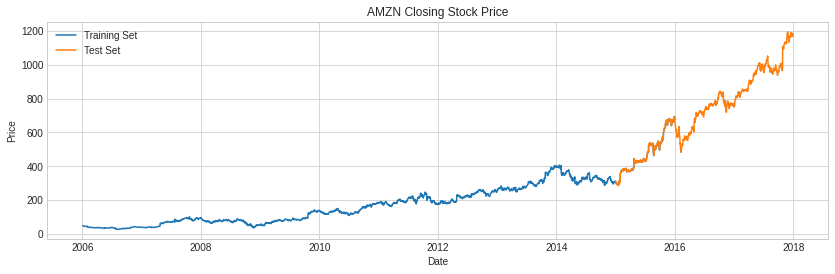

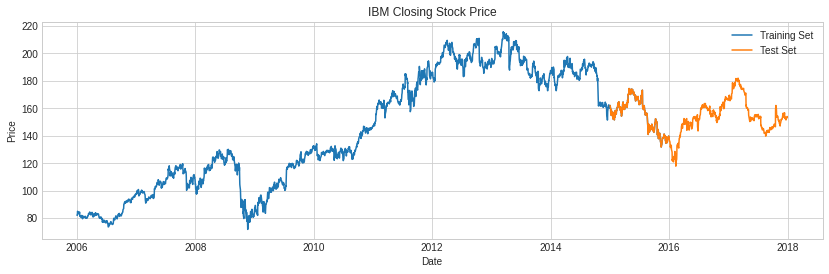

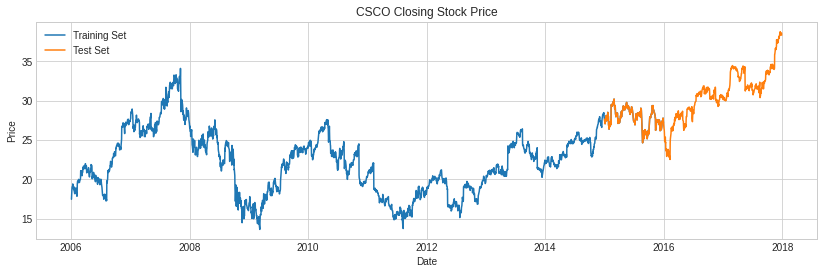

In [12]:
# Print training set and test set
for i in stockList:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["Train"])
    plt.plot(df_new[i]["Test"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

In [13]:
# Scaling the training set
# We rescale all stock price to zero for the lowest and 1 for the highest. Each of company have their own scale. We make another two dictionary which contain scaled price for each company. One contain train set and another contain test set.

# We also create another dictionary for collecting the scaller. This will be useful when we want to inverse transform our prediction.

transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"])
    a1 = np.array(df_new[i]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc
    
del a0
del a1

In [14]:
#print test and train shape for epoch operation
for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)

GE (2517, 1)
MSFT (2516, 1)
GOOGL (2516, 1)
AAPL (2516, 1)
AMZN (2516, 1)
IBM (2517, 1)
CSCO (2516, 1)


GE (755, 1)
MSFT (755, 1)
GOOGL (755, 1)
AAPL (755, 1)
AMZN (755, 1)
IBM (755, 1)
CSCO (755, 1)


In [15]:
# We think 60 feature will be enough training. We prepare shape our test and train set for neural network input

trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(60,2516):
        X_train.append(transform_train[j][i-60:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(60, 755):
        X_test.append(transform_test[j][i-60:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [16]:
# Check the shape (again) before start training
arr_buff = []
for i in stockList:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockList)

,X_train,y_train,X_test,y_test
GE,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"
MSFT,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"
GOOGL,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"
AAPL,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"
AMZN,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"
IBM,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"
CSCO,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"


In [17]:
######################################### LSTM archietecture (just uncomment to run)
# %%time
# # The LSTM architecture
# regressor = Sequential()
# # First LSTM layer with Dropout regularisation
# regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
# regressor.add(Dropout(0.2))
# # Second LSTM layer
# regressor.add(LSTM(units=50, return_sequences=True))
# regressor.add(Dropout(0.2))
# # Third LSTM layer
# regressor.add(LSTM(units=50, return_sequences=True))
# regressor.add(Dropout(0.5))
# # Fourth LSTM layer
# regressor.add(LSTM(units=50))
# regressor.add(Dropout(0.5))
# # The output layer
# regressor.add(Dense(units=1))

# # Compiling the RNN
# regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# # Fitting to the training set
# for i in stockList:
#     print("Fitting to", i)
#     regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=10, batch_size=200)


#---------------------------------------------------
############################################################################## The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
for i in stockList:
    print("Fitting to", i)
    regressorGRU.fit(trainset[i]["X"], trainset[i]["y"],epochs=50,batch_size=150)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Fitting to GE
Epoch 1/50
17/17 [==============================] - 10s 218ms/step - loss: 0.0927
Epoch 2/50
17/17 [==============================] - 4s 210ms/step - loss: 0.0310
Epoch 3/50
17/17 [==============================] - 4s 210ms/step - loss: 0.0143
Epoch 4/50
17/17 [==============================] - 4s 221ms/step - loss: 0.0053
Epoch 5/50
17/17 [==============================] - 4s 209ms/step - loss: 0.0037
Epoch 6/50
17/17 [==============================] - 4s 211ms/step - loss: 0.0035
Epoch 7/50
17/17 [==============================] - 4s 212ms/step - loss: 0.0031
Epoch 8/50
17/17 [==============================] - 4s 216ms/step - loss: 0.0028
Epoch 9/50
17/17 [==============================] - 4s 216ms/step - loss: 0.0027
Epoch 10/50
17/17 [==============================] - 4s 209ms/step - loss: 0.0027
Epoch 11/50
17/17 [==============================] - 4s 208ms/step - loss: 0.0026
Epoch 12/50
17/17 [==============================] - 4s 215ms/step - loss: 0.0024
Epoch 13/5

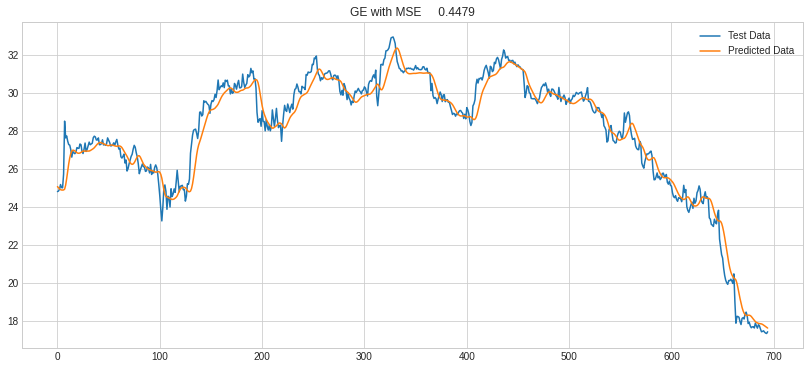

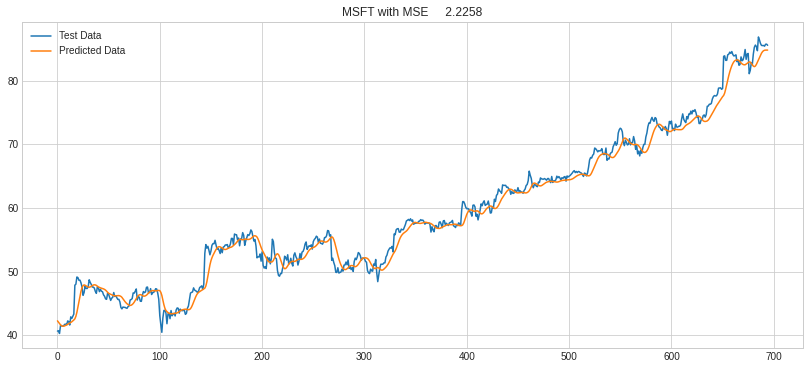

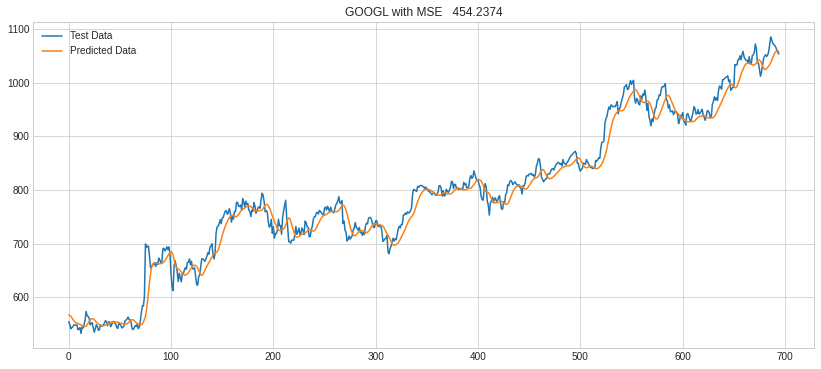

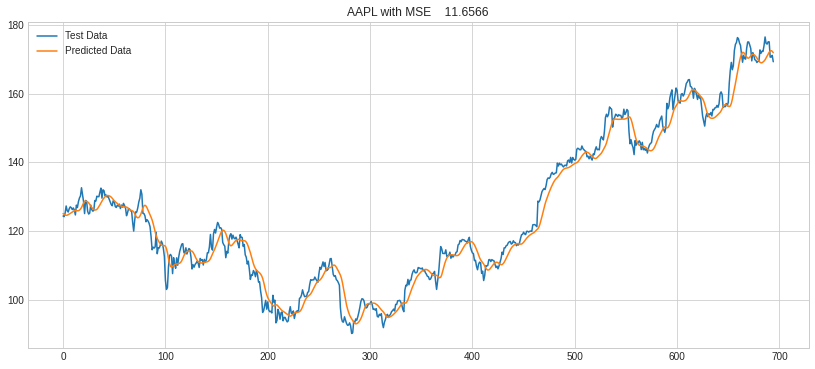

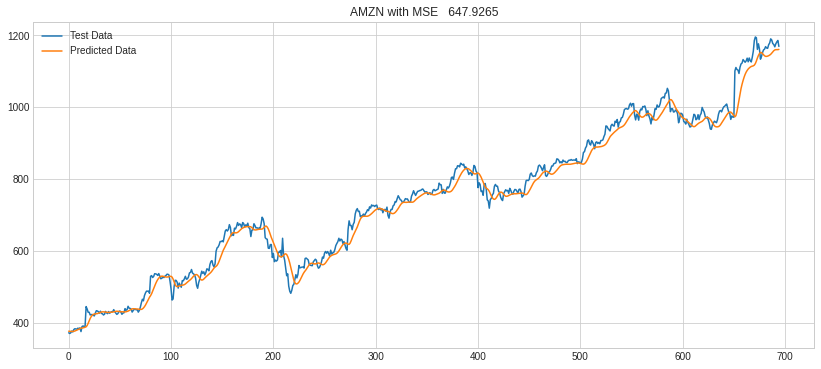

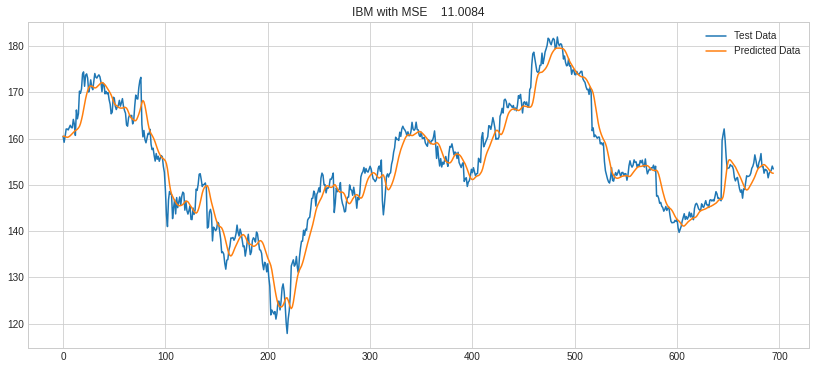

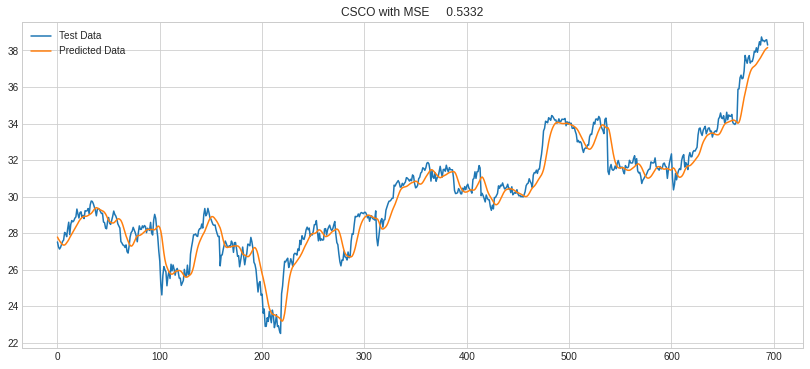

In [24]:
# Truth be told. That's one awesome score.

# LSTM is not the only kind of unit that has taken the world of Deep Learning by a storm. We have Gated Recurrent Units(GRU). It's not known, which is better: GRU or LSTM becuase they have comparable performances. GRUs are easier to train than LSTMs.
# In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

############################################## Plot LSTM fitting
# pred_result = {}
# for i in stockList:
#     y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
#     y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))
#     MSE = mean_squared_error(y_true, y_pred)
#     pred_result[i] = {}
#     pred_result[i]["True"] = y_true
#     pred_result[i]["Pred"] = y_pred
    
#     plt.figure(figsize=(14,6))
#     plt.title("{} with MSE {:10.4f}".format(i,MSE))
#     plt.plot(y_true)
#     plt.plot(y_pred)

# for i in stockList:
#     y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
#     y_pred = scaler[i].inverse_transform(regressorGRU.predict(testset[i]["X"]))
#     MSE = mean_squared_error(y_true, y_pred)
    
#     plt.figure(figsize=(14,6))
#     plt.title("{} with MSE {:10.4f}".format(i,MSE))
#     plt.plot(y_true)
#     plt.plot(y_pred)

############################################## Plot GRU fitting
pred_result = {}
for i in stockList:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressorGRU.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)
    plt.legend(["Test Data", "Predicted Data"])

Prediction without Lag, GE MSE     0.4479
Prediction with Lag 5, GE MSE     0.1115
Prediction without Lag, MSFT MSE     2.2258
Prediction with Lag 5, MSFT MSE     0.5090
Prediction without Lag, GOOGL MSE   454.2374
Prediction with Lag 5, GOOGL MSE   103.2952
Prediction without Lag, AAPL MSE    11.6566
Prediction with Lag 5, AAPL MSE     2.4599
Prediction without Lag, AMZN MSE   647.9265
Prediction with Lag 5, AMZN MSE   160.3031
Prediction without Lag, IBM MSE    11.0084
Prediction with Lag 5, IBM MSE     2.5943
Prediction without Lag, CSCO MSE     0.5332
Prediction with Lag 5, CSCO MSE     0.0988


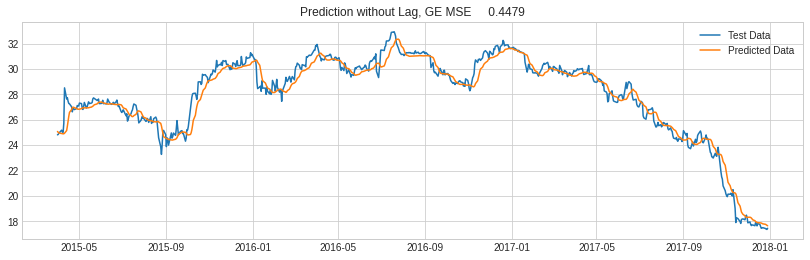

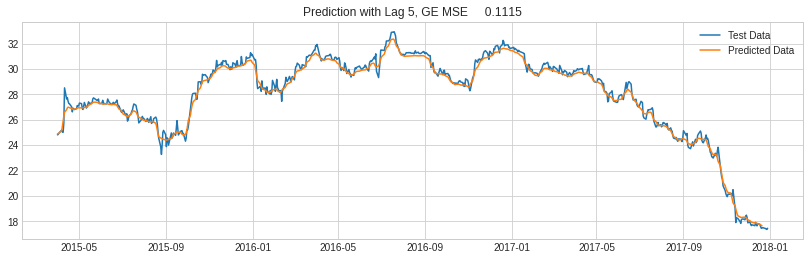

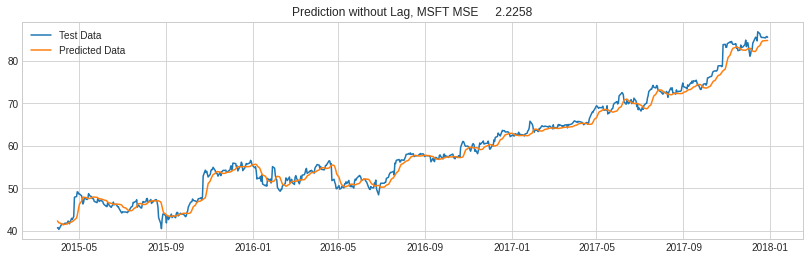

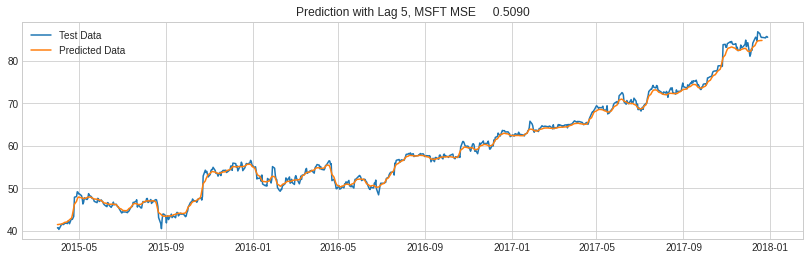

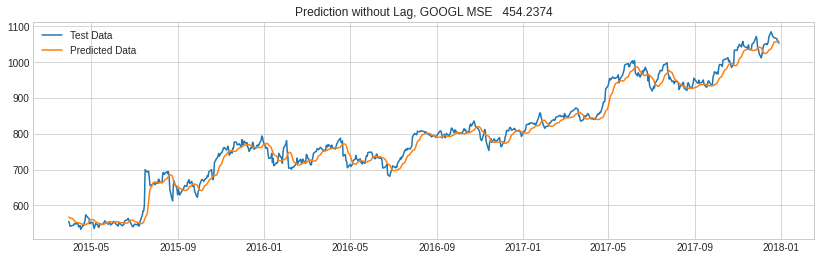

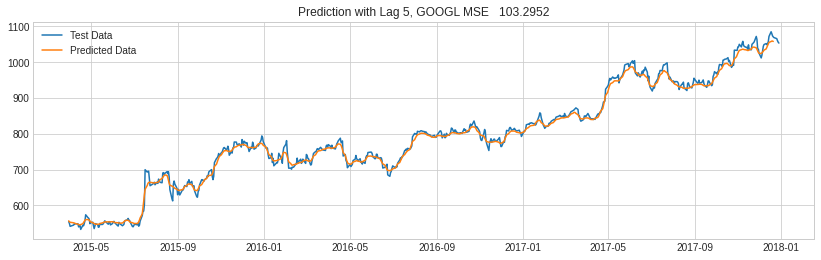

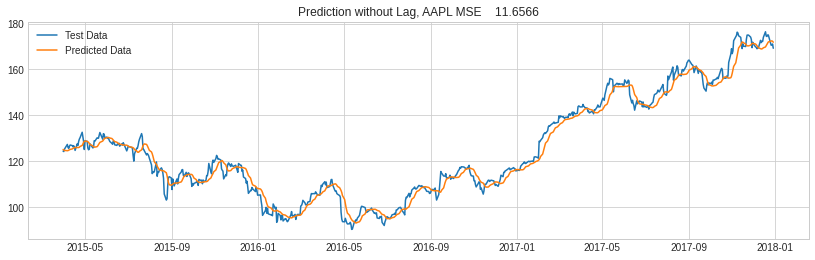

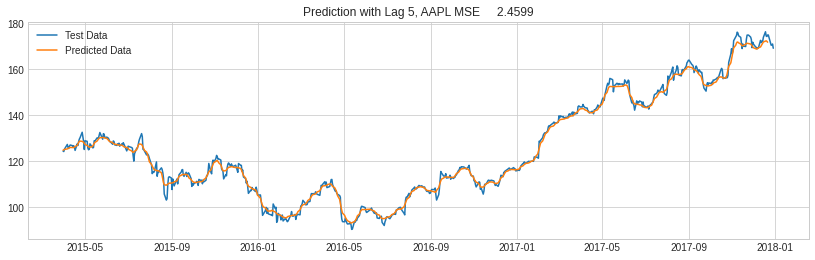

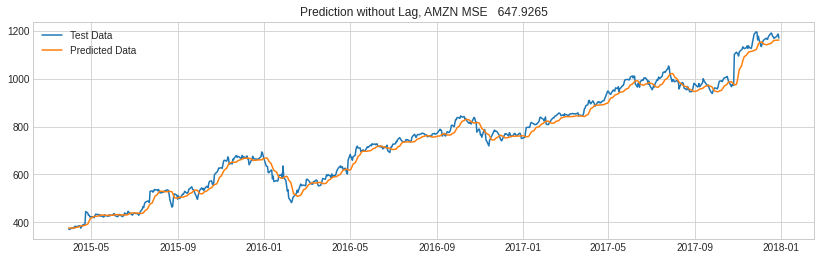

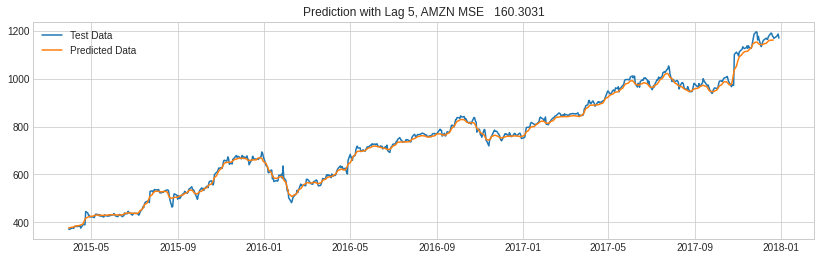

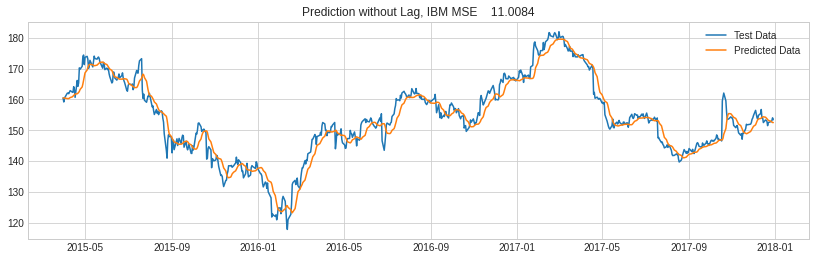

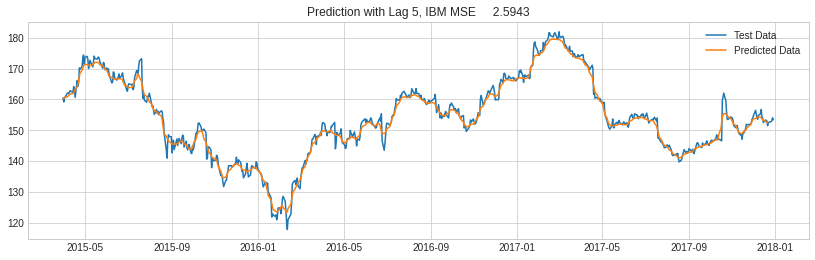

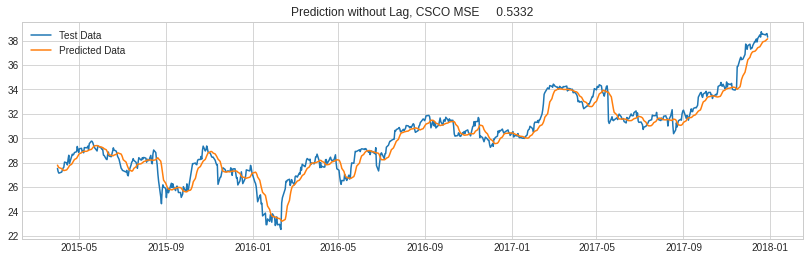

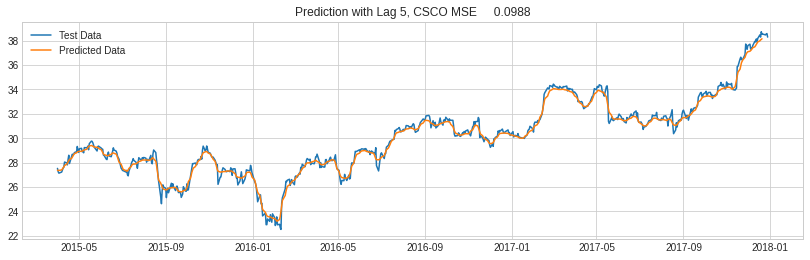

In [25]:
# We can improve our prediction by introducing shifting/lagging. Essentialy we slide our prediction for a period of time. This is a common practice in signal processing subfield.

# When we displace to make our prediction start earlier, we call it lagging. As for consequences, lagged prediction will have last -- equal to how much we displace the prediction -- value equal to NaN. If we lag it by 5 day, then the last 5 day prediction will become NaN.

# When we displace to make our prediction start later, we call it shifting. As for consequenceses, shifted prediction will have first -- equal to how much we displace the prediction -- value equal to NaN. If we shift it by 5 day, then the last 5 day prediction will become NaN.


time_index = 0

def lagging(df, lag, time_index):
    df_pred = pd.Series(df["Pred"].reshape(-1), index=time_index)
    df_true = pd.Series(df["True"].reshape(-1), index=time_index)
    
    df_pred_lag = df_pred.shift(lag)
    
    print("Prediction without Lag, {} MSE {:10.4f}".format(i,mean_squared_error(np.array(df_true), np.array(df_pred))))
    print("Prediction with Lag 5, {} MSE {:10.4f}".format(i,mean_squared_error(np.array(df_true[:-5]), np.array(df_pred_lag[:-5]))))

    plt.figure(figsize=(14,4))
    plt.title("Prediction without Lag, {} MSE {:10.4f}".format(i,mean_squared_error(np.array(df_true), np.array(df_pred))))
    plt.plot(df_true)
    plt.plot(df_pred)
    plt.legend(["Test Data", "Predicted Data"])

    MSE_lag = mean_squared_error(np.array(df_true[:-5]), np.array(df_pred_lag[:-5]))
    plt.figure(figsize=(14,4))
    plt.title("Prediction with Lag 5, {} MSE {:10.4f}".format(i,mean_squared_error(np.array(df_true[:-5]), np.array(df_pred_lag[:-5]))))
    plt.plot(df_true)
    plt.plot(df_pred_lag)
    plt.legend(["Test Data", "Predicted Data"])


for i in stockList:
    time_index = df_new[i]["Test"][60:].index
    lagging(pred_result[i], -5, time_index)